In [1]:
import numpy as np
# numpy is aliased as np
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# matplotlib.pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

#### Link to the Kaggle Competition dataset
https://www.kaggle.com/competitions/santander-customer-satisfaction/data

In [2]:
train_df = pd.read_csv('cust_satisfaction_train.csv')
print(type(train_df))
train_df.head()

<class 'pandas.core.frame.DataFrame'>


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
test_df = pd.read_csv('cust_satisfaction_test.csv')
print(type(test_df))
test_df.head()

<class 'pandas.core.frame.DataFrame'>


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [4]:
print(train_df.shape)  # rows=76020, cols=371
print(test_df.shape)   # rows=75818, cols=370

(76020, 371)
(75818, 370)


#### Handling Null values

In [5]:
# nv = null values
nv_train = train_df.isnull().sum()
nv_train = nv_train[nv_train>0]
nv_train

Series([], dtype: int64)

In [6]:
nv_test = test_df.isnull().sum()
nv_test = nv_test[nv_test>0]
nv_test

Series([], dtype: int64)

#### Checking Duplicates

In [7]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


#### Checking Target variable

In [8]:
train_df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [9]:
r = train_df['TARGET'].value_counts()
r

0    73012
1     3008
Name: TARGET, dtype: int64

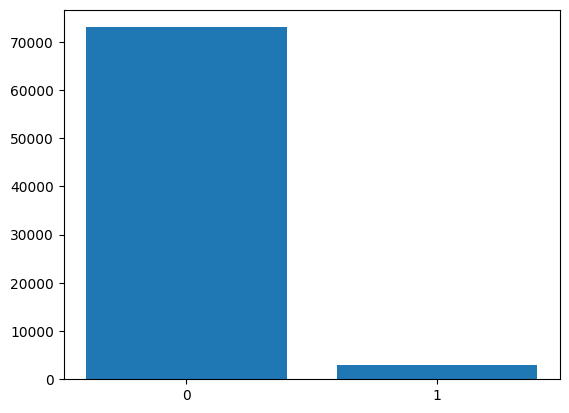

In [10]:
plt.bar(r.index,r)
plt.xticks(r.index)
plt.show()

#### Checking Column having only single catgeory value
Fetching and dropping the columns that has excatly a single values

In [11]:
for i in train_df.columns:    # i refers to the column in train_df
    if train_df[i].nunique() == 1:
        print(i)
        train_df.drop(i, inplace = True, axis = 1)
        test_df.drop(i, inplace = True, axis = 1)

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [12]:
print(train_df.shape)
print(test_df.shape)

(76020, 337)
(75818, 336)


#### EDA

#### Plotting boxplot for the 16 features of train_data

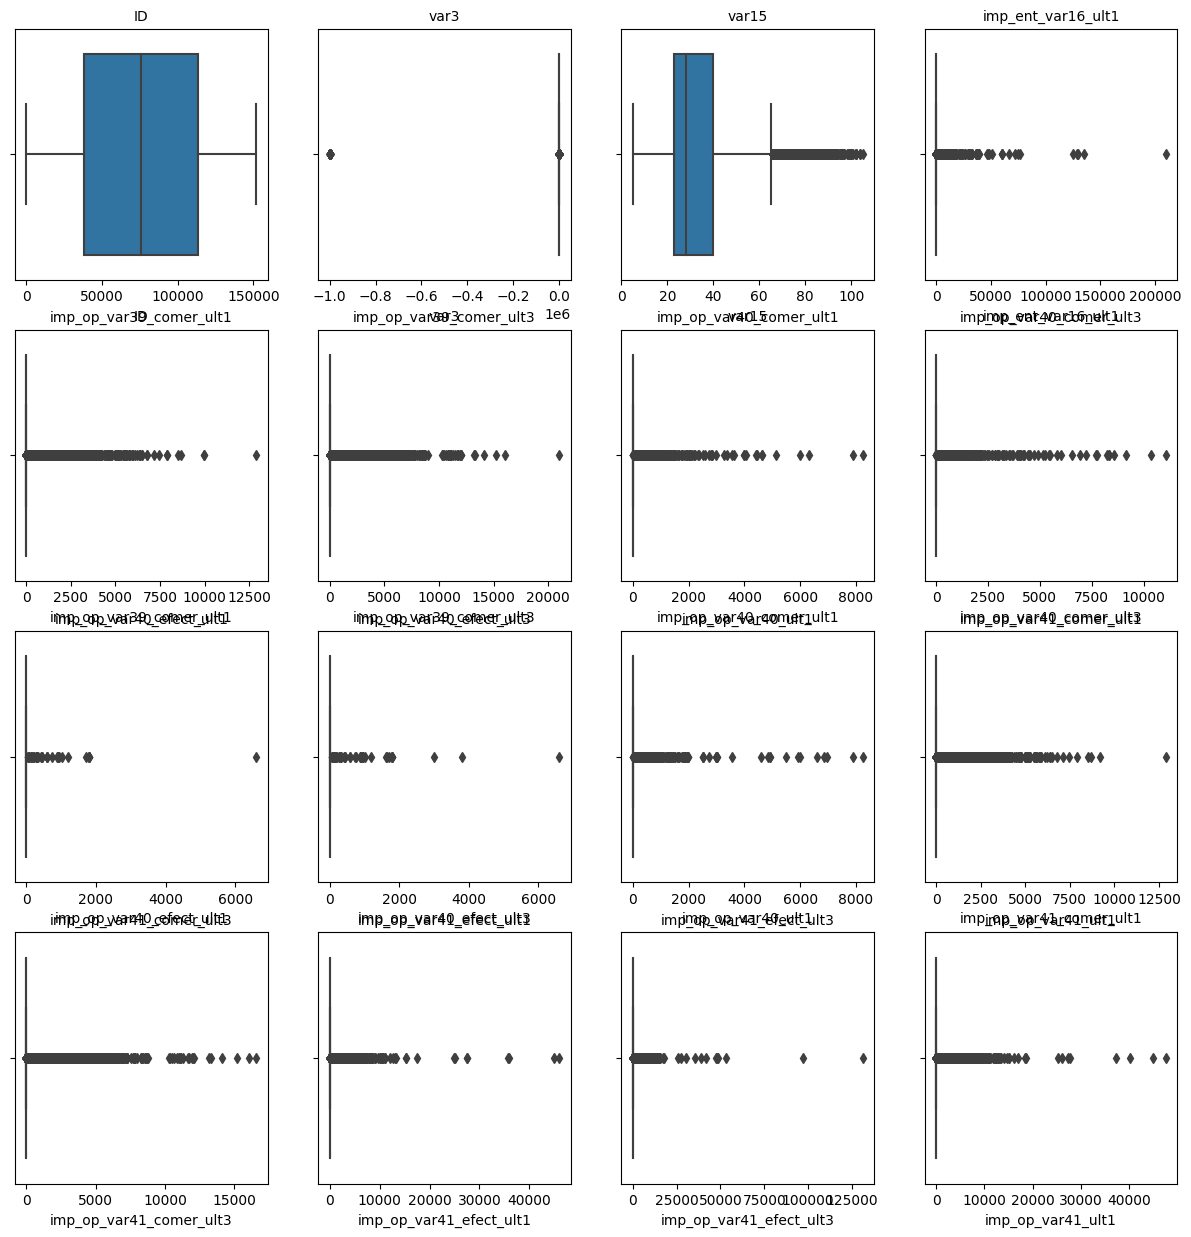

In [13]:
plt.figure(figsize = (15,15))
for i in range(16):
    plt.subplot(4,4, i+1)
    sns.boxplot(x=train_df.iloc[:,i])   # detect outliers
    plt.title(train_df.columns[i], size = 10)
plt.show()

In [14]:
train_df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=337)

In [15]:
test_df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=336)

#### Univariate Statistical Analysis

In [16]:
train_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [17]:
test_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,...,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,75874.830581,-1579.955011,33.138832,83.164329,74.312894,123.136448,4.578517,7.666855,0.470645,0.672444,...,0.160595,12.438559,1.327408,17.469991,12.674349,63.597839,11.404505,95.973025,70.504319,1.173863e+05
std,43882.370827,39752.473358,12.932000,1694.873886,364.211245,606.431562,133.383326,239.701416,34.028605,42.336668,...,32.441677,958.651673,170.449935,1252.618781,895.165516,3754.668953,1061.858193,4658.871575,3318.527783,2.479384e+05
min,2.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.600000,-0.600000,0.000000,0.000000,0.000000,0.000000,1.202730e+03
25%,37840.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.754961e+04
50%,75810.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057643e+05
75%,113996.500000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.183159e+05
max,151837.000000,238.000000,105.000000,240000.000000,21093.960000,47943.960000,21093.960000,47943.960000,6600.000000,6600.000000,...,8030.160000,146605.320000,40080.600000,162355.800000,138054.960000,453893.400000,217762.230000,496198.080000,354260.730000,2.889440e+07


#### Checking datatypes in train and test datasets

In [18]:
train_df.dtypes.value_counts()

int64      226
float64    111
dtype: int64

In [19]:
test_df.dtypes.value_counts()

int64      226
float64    110
dtype: int64

#### Selecting Features using Correlation

In [20]:
corr_train = train_df.corr()
corr_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-0.006302,-0.006700,-0.006698,...,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687,0.003148
var3,-0.001025,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,...,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.002135,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,...,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,-0.003111,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,...,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007,-0.000017
imp_op_var39_comer_ult1,-0.001436,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,0.295295,0.032280,0.054809,...,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546,0.010353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.003674,0.000508,0.018884,-0.000612,0.005532,0.006359,-0.000480,-0.000529,-0.000170,-0.000195,...,-0.000219,-0.000151,-0.000196,-0.000205,0.332172,1.000000,0.229158,0.213191,0.003646,-0.002553
saldo_medio_var44_ult1,-0.000856,0.000738,0.032833,0.005055,0.011665,0.010660,-0.000254,-0.000510,-0.000254,-0.000292,...,0.000819,-0.000225,0.002493,0.002205,0.818300,0.229158,1.000000,0.968167,0.003258,-0.003104
saldo_medio_var44_ult3,0.000297,0.000778,0.033597,0.006590,0.010802,0.009822,-0.000372,-0.000601,-0.000268,-0.000308,...,0.000977,-0.000238,0.002905,0.002574,0.710593,0.213191,0.968167,1.000000,0.003037,-0.003015
var38,-0.005687,0.000071,0.006497,0.000007,0.012546,0.013271,0.016628,0.015584,-0.000315,0.000682,...,0.004448,0.001605,0.004255,0.004290,0.002889,0.003646,0.003258,0.003037,1.000000,-0.019510


In [21]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()   # correlation matrix
    for i in range(len(corr_matrix.columns)):  # i is the index
        for j in range(i):
            if(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

corr_features = correlation(train_df, 0.85)
print("Features with high correlation ", corr_features)

Features with high correlation  ['saldo_medio_var13_medio_ult1', 'saldo_medio_var17_hace3', 'ind_var13_medio', 'num_var37_0', 'saldo_var32', 'num_var8', 'num_op_var39_comer_ult3', 'saldo_medio_var12_ult3', 'saldo_medio_var44_ult3', 'num_reemb_var13_ult1', 'num_op_var41_comer_ult1', 'delta_imp_amort_var18_1y3', 'ind_var17', 'num_var45_hace2', 'num_meses_var13_corto_ult3', 'imp_trasp_var33_out_ult1', 'saldo_var29', 'saldo_var6', 'delta_num_venta_var44_1y3', 'saldo_medio_var29_ult1', 'num_var13_largo_0', 'saldo_var31', 'ind_var37', 'num_var13_largo', 'num_var29_0', 'imp_op_var41_comer_ult3', 'num_trasp_var33_in_ult1', 'num_var14', 'saldo_var34', 'num_meses_var5_ult3', 'saldo_medio_var33_ult1', 'num_var33', 'num_var13_medio', 'num_op_var41_efect_ult3', 'num_var29', 'ind_var26_0', 'num_meses_var12_ult3', 'imp_op_var40_comer_ult3', 'ind_var39', 'saldo_medio_var8_ult3', 'saldo_var40', 'ind_var37_0', 'num_var34_0', 'num_var32_0', 'delta_num_compra_var44_1y3', 'num_trasp_var17_out_ult1', 'num_v

In [22]:
print(len(corr_features))

191


In [23]:
train_df.drop(columns=corr_features, axis=1, inplace=True)
test_df.drop(columns=corr_features, axis=1, inplace=True)
print(train_df.shape)
print(test_df.shape)

(76020, 146)
(75818, 145)


#### Dropping ID column

In [24]:
train_df1 = train_df.copy()
print(train_df1.shape)

(76020, 146)


In [25]:
train_df.drop('ID', inplace = True, axis = 1)
test_df.drop('ID', inplace = True, axis = 1)

In [26]:
print(train_df.shape)
print(test_df.shape)

(76020, 145)
(75818, 144)


#### Select the Dependent and Independent Features

In [27]:
x = train_df.drop('TARGET',axis=1)  # dataframe
y = train_df['TARGET']              # series
print(type(x))
print(type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(76020, 144) (76020,)


#### Dividing the data into training and testing data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
print(76020*0.25)
print(76020 - 19005)

19005.0
57015


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(57015, 144)
(19005, 144)
(57015,)
(19005,)


#### Creating Functions to generate confusion matrix, classification report, accuracy score, ROC_AUC Score and to compute Training and the Testing Score

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve, auc

In [32]:
d = {'Model':[],'TP':[],'FN':[],'FP':[],'TN':[],'Acc':[],'AUC':[]}

def eval_model(model,model_name,x_test,ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    acc = accuracy_score(ytest,ypred)
    cls_rep = classification_report(ytest,ypred,zero_division=0)
    auc_score = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('Confusion Matrix\n',cm)
    print('Accuracy Score',acc)
    print('AUC Score',auc_score)
    print('Classification Report\n',cls_rep)
    d['Model'].append(model_name)
    d['TP'].append(cm[0,0])
    d['FN'].append(cm[0,1])
    d['FP'].append(cm[1,0])
    d['TN'].append(cm[1,1])
    d['Acc'].append(acc)
    d['AUC'].append(auc_score)
    
    
def plot_roc_auc(model,ytest):
    fpr,tpr,thresh = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    auc_score = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('Area Under Curve',auc_score)
    plt.plot(fpr,tpr,color='orange')
    plt.plot([0,1],[0,1],label='TPR=FPR')
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.legend()
    plt.show()
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training dataset Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing dataset accuracy

#### 1) Applying Logistic Regression

In [33]:
# importing LogReg library
from sklearn.linear_model import LogisticRegression

In [34]:
# Building the LogReg model
log_reg = LogisticRegression(max_iter=100000,solver='liblinear')
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=100000, solver='liblinear')

In [35]:
# Computing Training and testing score
mscore(log_reg)

Training Score 0.9606068578444269
Testing Score 0.9599052880820836


In [36]:
# Generating prediction
ypred_logreg = log_reg.predict(x_test)
print(ypred_logreg)

[0 0 0 ... 0 0 0]


In [37]:
# Evaluate the model - confusion matrix, clasification Report, AUC Score, Accuaracy
eval_model(log_reg,'Log_Reg',x_test,y_test,ypred_logreg)

Confusion Matrix
 [[18243     0]
 [  762     0]]
Accuracy Score 0.9599052880820836
AUC Score 0.5942131760745825
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18243
           1       0.00      0.00      0.00       762

    accuracy                           0.96     19005
   macro avg       0.48      0.50      0.49     19005
weighted avg       0.92      0.96      0.94     19005



Area Under Curve 0.5942131760745825


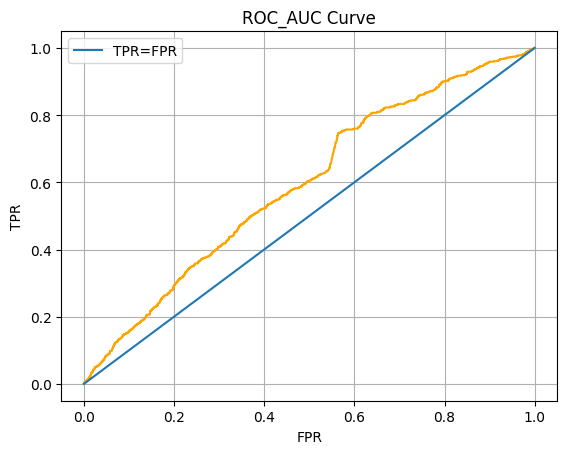

In [38]:
# Plotting ROC AUC Curve
plot_roc_auc(log_reg,y_test)

#### Applying Decision Tree Classifier

In [39]:
# importing DT library
from sklearn.tree import DecisionTreeClassifier

In [40]:
# Building the Decition Tree model
dt = DecisionTreeClassifier(criterion='gini',min_samples_split=50,max_depth=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

In [41]:
# Training and the Testing Score
mscore(dt)

Training Score 0.9619047619047619
Testing Score 0.9583793738489871


In [42]:
# Generating the predictions
ypred_dt = dt.predict(x_test)

In [43]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(dt,'DT',x_test,y_test,ypred_dt)

Confusion Matrix
 [[18207    36]
 [  755     7]]
Accuracy Score 0.9583793738489871
AUC Score 0.7945761168523561
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18243
           1       0.16      0.01      0.02       762

    accuracy                           0.96     19005
   macro avg       0.56      0.50      0.50     19005
weighted avg       0.93      0.96      0.94     19005



Area Under Curve 0.7945761168523561


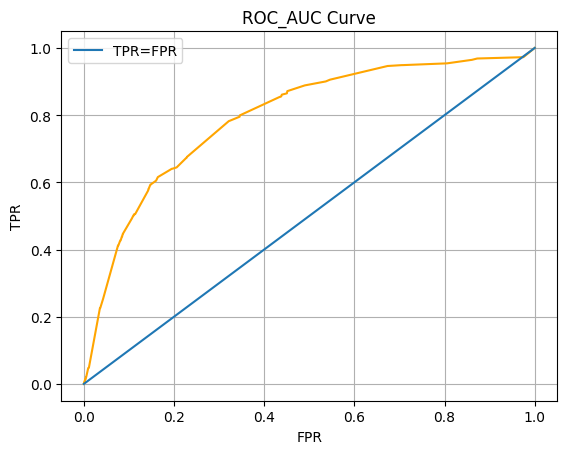

In [44]:
# Plotting ROC_AUC Curve
plot_roc_auc(dt,y_test)

#### Applying RandomForest Classifier

In [45]:
# Import random Forest library
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Building the RF Model
rf = RandomForestClassifier(n_estimators=80,criterion='gini',min_samples_split=50,max_depth=10)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=50, n_estimators=80)

In [47]:
# Training and the testing Score
mscore(rf)

Training Score 0.960641936332544
Testing Score 0.9599052880820836


In [48]:
# Generating the predictions
ypred_rf = rf.predict(x_test)

In [49]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(rf,'Random Forest',x_test,y_test,ypred_rf)

Confusion Matrix
 [[18243     0]
 [  762     0]]
Accuracy Score 0.9599052880820836
AUC Score 0.8119262082044052
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18243
           1       0.00      0.00      0.00       762

    accuracy                           0.96     19005
   macro avg       0.48      0.50      0.49     19005
weighted avg       0.92      0.96      0.94     19005



Area Under Curve 0.8119262082044052


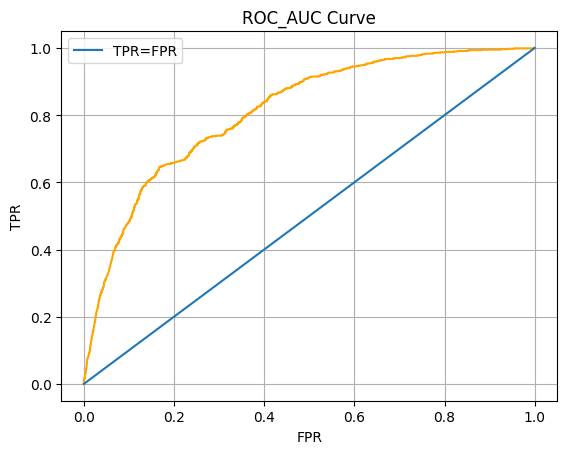

In [50]:
# Plotting ROC_AUC Curve
plot_roc_auc(rf,y_test)

#### Applying Ensemble Learning

In [51]:
# Importing the  AdaBoost Classifier library
from sklearn.ensemble import AdaBoostClassifier

In [52]:
# Builing the Adaboost model
adab = AdaBoostClassifier(n_estimators=70)
adab.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=70)

In [53]:
# Computing the Training and Testing Score
mscore(adab)

Training Score 0.9606068578444269
Testing Score 0.959642199421205


In [54]:
# Generating the predictions
ypred_adab = adab.predict(x_test)

In [55]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(adab,'AdaBoost',x_test,y_test,ypred_adab)

Confusion Matrix
 [[18234     9]
 [  758     4]]
Accuracy Score 0.959642199421205
AUC Score 0.824064434594911
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18243
           1       0.31      0.01      0.01       762

    accuracy                           0.96     19005
   macro avg       0.63      0.50      0.49     19005
weighted avg       0.93      0.96      0.94     19005



Area Under Curve 0.824064434594911


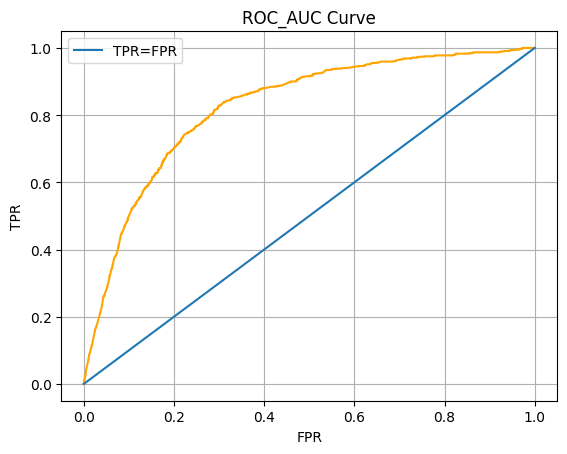

In [56]:
# Plotting the ROC_AUC Curve
plot_roc_auc(adab,y_test)

#### Comparing different Classification Models

In [57]:
print(d)

{'Model': ['Log_Reg', 'DT', 'Random Forest', 'AdaBoost'], 'TP': [18243, 18207, 18243, 18234], 'FN': [0, 36, 0, 9], 'FP': [762, 755, 762, 758], 'TN': [0, 7, 0, 4], 'Acc': [0.9599052880820836, 0.9583793738489871, 0.9599052880820836, 0.959642199421205], 'AUC': [0.5942131760745825, 0.7945761168523561, 0.8119262082044052, 0.824064434594911]}


In [58]:
model_performance = pd.DataFrame(d)
model_performance

,Model,TP,FN,FP,TN,Acc,AUC
0,Log_Reg,18243,0,762,0,0.959905,0.594213
1,DT,18207,36,755,7,0.958379,0.794576
2,Random Forest,18243,0,762,0,0.959905,0.811926
3,AdaBoost,18234,9,758,4,0.959642,0.824064


#### Generating Predictions on Test data using AdaBoost Classifier

In [59]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)
print(y.shape)

(57015, 144)
(19005, 144)
(76020, 144)
(76020,)


#### Final model (AdaBoost Classifier) based on Evaluation from model_performance dataframe

In [60]:
model = AdaBoostClassifier(n_estimators=70)
model.fit(x,y)  # x and y is from train_df

AdaBoostClassifier(n_estimators=70)

In [61]:
test_df.shape

(75818, 144)

#### Generating Predictions on the test_df

In [62]:
ypred = model.predict(test_df)

#### Adding the prediction results to the sample_submission file

In [63]:
sample = pd.read_csv('sample_submission.csv')
sample.shape

(75818, 2)

In [64]:
sample.columns

Index(['ID', 'TARGET'], dtype='object')

In [65]:
sample.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [66]:
sample['TARGET'].value_counts()

0    75818
Name: TARGET, dtype: int64

In [67]:
sample['TARGET'] = ypred
sample.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [68]:
sample['TARGET'].value_counts()

0    75768
1       50
Name: TARGET, dtype: int64

In [69]:
sample.to_csv('sample_submission_major_proj.csv')

#### Save the Model

In [70]:
import pickle

In [71]:
pickle.dump(model, open('sat_predict.pkl', 'wb'))   # wb = write binary

#### Load the Model

In [72]:
loaded_model = pickle.load(open('sat_predict.pkl', 'rb'))  # rb = read binary

In [73]:
satisfaction_pred = loaded_model.predict(test_df)
print(satisfaction_pred)

[0 0 0 ... 0 0 0]


#### Referance links (This Links contains some more Classification algorithms with some statistical analysis on data, this is purely for your referance)
1) corr -> https://www.kaggle.com/code/parisrohan/customer-satisfaction
    
2) all models - https://www.kaggle.com/code/rocklen/santander-customer-satisfaction
    
3) mlp -> https://www.kaggle.com/code/yeonseokcho/santander-customer-satisfaction-mlpclassifier#2.-features-data-standardization
    
4) feature selection -> https://www.kaggle.com/code/kinnerakiran/guide-on-feature-selection    
